<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/CNN_%26_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow
Computer vision is thr practice of writing algorithms which can discorver patterns in visual data. Such as the camera of a self driving car recognizing the car in front

# Get the data (Food101)

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-02 11:23:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   270MB/s    in 0.4s    

2023-08-02 11:23:59 (270 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

# Inspect the data(becoming one with data)
Very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project , this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak  # Datanın içindeki listelere bakmak için !ls kullanıyoruz.

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath , dirnames , filenames , in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' " )   # 0 images yazanlara bakmıyoruz onlar datanın yapıldıgı bilgisayarda ds.store şeklinde tutulmuş olması yüzünden öyle gözüküyor. biz test olarak 250 train olarak 750 foto oldugunu görebiliyoruz bu şekilde

There are 2 directories and 0 images in 'pizza_steak' 
There are 2 directories and 0 images in 'pizza_steak/test' 
There are 0 directories and 250 images in 'pizza_steak/test/steak' 
There are 0 directories and 250 images in 'pizza_steak/test/pizza' 
There are 2 directories and 0 images in 'pizza_steak/train' 
There are 0 directories and 750 images in 'pizza_steak/train/steak' 
There are 0 directories and 750 images in 'pizza_steak/train/pizza' 


In [6]:
# Another way to find out how many images are in file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

# To visualize our image , first lets get the class names programmaticaly.

In [7]:
# Get the classnames programmaticaly
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  #Created a list of class_names from subdirectories
print(class_names)
#Sonuç olarak, bu kod, "pizza_steak/train" dizinindeki alt dizinleri dolaşarak eğitim veri setinde bulunan sınıf adlarını alır ve alfabetik olarak sıralanmış bir sınıf adları listesi olan class_names değişkenine atar.

['pizza' 'steak']


In [8]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  # Setup the target directory (We will view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder) , 1)  #target folderın içinden os.listdir ile 1 tane random img alıyor.
  print(random_image)

  # Read in the image and plot it using mathplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0]) #Bu ifade, hedef dizin ile rastgele seçilen resmin dosya adını birleştirerek, rastgele seçilen resmin tam yolunu oluşturur.
  #imread fonksiyonu, belirtilen dosya yolundaki resmi diskten belleğe yükler. Bu fonksiyon, resim dosyasını Numpy dizisine dönüştürür ve bu Numpy dizisini geri döndürür.
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f" Image shape : {img.shape}")
  return img  #burda image return etmemizin sebebi yukardaki imread fonksiyonunun numpy array olarak döndürmesi image ları

  #Bu Python kodu, verilen hedef dizindeki belirli bir hedef sınıfa ait rastgele bir görüntüyü görselleştiren bir fonksiyon içerir.




['1421393.jpg']
 Image shape : (384, 512, 3)


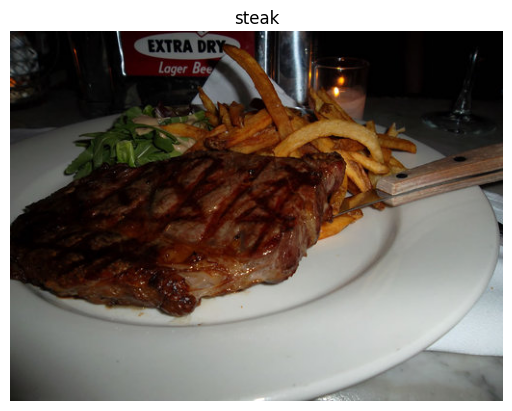

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/" , target_class = "steak")

In [10]:
img #numpy array
import tensorflow as tf
tf.constant(img)  #burda array içinde gördüğümüz değerler aslında sırasıyla RGB formatına göre oluyor ve bu değerlerin hepsi 0 la 255 arasında. Yani son index 255 olsaydı herhangi bir image da bu demek oluyor ki image çok fazla blue pixel içeriyor.

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[25, 28, 33],
        [17, 20, 25],
        [15, 16, 20],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[17, 18, 22],
        [20, 21, 25],
        [23, 23, 25],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[25, 25, 25],
        [24, 22, 23],
        [22, 18, 19],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[25, 26, 21],
        [26, 27, 22],
        [26, 27, 22],
        ...,
        [78, 83, 79],
        [83, 88, 84],
        [87, 92, 88]],

       [[24, 25, 20],
        [24, 25, 20],
        [25, 26, 21],
        ...,
        [73, 78, 74],
        [79, 84, 80],
        [84, 89, 85]],

       [[23, 24, 19],
        [23, 24, 19],
        [24, 25, 20],
        ...,
        [70, 75, 71],
        [76, 81, 77],
        [81, 86, 82]]], dtype=uint8)>

In [11]:
# View our image shape
img.shape  #width , height , colour channels

(384, 512, 3)

# Many machine learning models , including neural networks prefer the values they work with to be between 0 and 1. Knowing this , one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

In [12]:
# Get all the pixel values between 0 and 1 (normalization but with 1 image)
img/255.



array([[[0.09803922, 0.10980392, 0.12941176],
        [0.06666667, 0.07843137, 0.09803922],
        [0.05882353, 0.0627451 , 0.07843137],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.06666667, 0.07058824, 0.08627451],
        [0.07843137, 0.08235294, 0.09803922],
        [0.09019608, 0.09019608, 0.09803922],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.09803922, 0.09803922, 0.09803922],
        [0.09411765, 0.08627451, 0.09019608],
        [0.08627451, 0.07058824, 0.0745098 ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.09803922, 0.10196078, 0.08235294],
        [0.10196078, 0.10588235, 0.08627451],
        [0.10196078, 0

#An end-to-end example

Lets build a convolutional neural network to find patterns in our images , more spesifically we need way to;

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"  #soldaki dosya işaretinden yolu kopyala diyebiliriz.
test_dir = "pizza_steak/test"  # veya böyle elimizle yazabiliriz.

# Preprocess data (get all of the pixel values between 0 and 1 , also called scaling/normalizatin)
train_datagen = ImageDataGenerator(rescale = 1./255)  #rescale : generate batches of tensor image data with real-time data augmentation ,her pixeli 255 e bölerek feature scaling yapıyor.(compulsary)
valid_datagen = ImageDataGenerator(rescale = 1./255) #Yani image data generator classını scale etmek için kullanıyoruz.

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir ,
                                               batch_size = 32 ,
                                               target_size = (224,224) ,  # Output images size
                                               class_mode = "binary"  , # Modelimize söylüyoruz binary çalışacağımızı 2 farklı classla çalışıyoruz çünkü.
                                               seed = 42
                                               )

valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32 ,
                                               target_size = (224,224) ,
                                               class_mode = "binary" ,
                                               seed = 42
                                               )

# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            kernel_size = 3,
                            activation = "relu" ,
                            input_shape = (224,224,3)) ,   #Yukarda valid ve train datalarda ne girdiysek shape imiz o olacak.

     tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,

     tf.keras.layers.MaxPool2D( pool_size = 2 ,
                               padding = "valid")   ,

     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.Conv2D( 10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D( 2 ) ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense( 1 , activation = "sigmoid") #output layer
    ]

)

#Compile a model
model_1.compile(loss = ["binary_crossentropy"] ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]
                )

#Fit the model
history_1 = model_1.fit(train_data , epochs = 5 , steps_per_epoch= len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))  #flow_from_directory sayesinde label değerlerini yazmamıza gerek kalmıyor çünkü it creates the data and labels automatically for us
#steps for epoch ta train datamızın uzunluğunu almamızın sebebi we needed to do 47 steps per epoch

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 157ms/step - loss: 0.5546 - accuracy: 0.7233 - val_loss: 0.4152 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4231 - accuracy: 0.8073 - val_loss: 0.3356 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3968 - accuracy: 0.8247 - val_loss: 0.3608 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3766 - accuracy: 0.8467 - val_loss: 0.3758 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3621 - accuracy: 0.8500 - val_loss: 0.3206 - val_accuracy: 0.8520


In [14]:
len(train_data) #bu 47 aslında her batch içinde kaç tane image oldugunu gösteriyor.
#Batchlere bölmemizin sebebi de direkt 1500 image atsak koda bilgisayarımız bunu çalıştırmakta çok zorlanır ve modelimiz düzgün çalışmayabilir bu yüzden batchlere ayırıp belli sayıda image ları atıyoruz.

47

In [15]:
1500 / 32  #1500 image i 32 batch e böldük ve her batch içinde kaç image oldugunu bu şekilde anlıyoruz.

46.875

In [31]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Using the same model as before

Lets replicate the model we have built in a previous section to see if it works with our image data

The model we are building is from the tensorflow.playground.org

In [30]:
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model

model_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224,224,3)) ,
     tf.keras.layers.Dense(10 , activation = "relu") ,
     tf.keras.layers.Dense(10 , activation = "relu") ,
     tf.keras.layers.Dense(4 , activation = "relu") ,
     tf.keras.layers.Dense(1 , activation = "sigmoid" )
    ]
)

# Compile a model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() ,
                optimizer = tf.keras.optimizers.Adam( learning_rate  = 0.1) ,
                metrics = ["accuracy"]

                )
#Fit model

history_2 = model_2.fit(train_data ,  epochs = 5 , steps_per_epoch = len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 128ms/step - loss: 61.9199 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6941 - accuracy: 0.4947 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6946 - accuracy: 0.5027 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.6969 - accuracy: 0.4840 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6938 - accuracy: 0.4867 - val_loss: 0.6932 - val_accuracy: 0.5000


In [32]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 150528)            0         
                                                                 
 dense_46 (Dense)            (None, 10)                1505290   
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
 dense_48 (Dense)            (None, 4)                 44        
                                                                 
 dense_49 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,505,449
Trainable params: 1,505,449
Non-trainable params: 0
_________________________________________________________________


# 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

# We will try to improve our model

In [37]:
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model

model_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = (224,224,3)) ,
     tf.keras.layers.Dense(200, activation = "relu") ,
     tf.keras.layers.Dense(200, activation = "relu") ,
     tf.keras.layers.Dense(200 , activation = "relu") ,
     tf.keras.layers.Dense(200 , activation = "relu") ,
     tf.keras.layers.Dense(1 , activation = "sigmoid")
    ]
)

# Compile a model

model_3.compile(loss = "binary_crossentropy" ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"]

                )
#Fit model

history_3 = model_3.fit(train_data ,  epochs = 5 , steps_per_epoch = len(train_data) , validation_data = valid_data , validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 8s 114ms/step - loss: 4.2558 - accuracy: 0.5827 - val_loss: 0.8900 - val_accuracy: 0.7220
Epoch 2/10
47/47 [==============================] - 5s 107ms/step - loss: 0.8127 - accuracy: 0.7007 - val_loss: 0.5011 - val_accuracy: 0.7780
Epoch 3/10
47/47 [==============================] - 6s 129ms/step - loss: 0.6421 - accuracy: 0.7213 - val_loss: 0.4577 - val_accuracy: 0.7860
Epoch 4/10
47/47 [==============================] - 6s 124ms/step - loss: 0.5616 - accuracy: 0.7393 - val_loss: 0.4461 - val_accuracy: 0.7860
Epoch 5/10
47/47 [==============================] - 5s 108ms/step - loss: 0.4817 - accuracy: 0.7760 - val_loss: 0.4752 - val_accuracy: 0.7840
Epoch 6/10
47/47 [==============================] - 6s 121ms/step - loss: 0.4548 - accuracy: 0.7847 - val_loss: 0.4182 - val_accuracy: 0.8000
Epoch 7/10
47/47 [==============================] - 7s 146ms/step - loss: 0.4686 - accuracy: 0.7933 - val_loss: 0.7961 - val_accuracy: 0.6660
Epoch 

# Burda öğrendiğimiz şey CNN in computer vision için ne kadar güçlü bir algorith oldugu. Çünkü biz normal NN algorithmasıyla ne kadar uğraşsak da CNN de elde ettigimiz accuracy yi elde edemedik 500x fazla learnable parametremiz olmasına rağmen.